In [ ]:
pip install Sastrawi

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
# import re
# from autocorrect import spell
import regex as re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd 
rating = pd.read_csv("/content/gdrive/My Drive/bangkit/kpp_serpong.csv")
rating.head(5)

,ulasan,rating
0,"Halaman parkir luas, ada kantin besar dgn berb...",3
1,"Pelayanan tidak memuaskan, pd tanggal 16/3/21 ...",1
2,Untuk perubahan data di Npwp pelayanannya sang...,5
3,"Pengalaman waktu pengurusan npwp, berasa sanga...",4
4,"Pelayanan bagus, terimakasih mas Ega.. super r...",5


In [ ]:
sentiment = {1: 0,
             2: 0,
             3: 0,
             4: 1,
             5: 1}
rating["sentiment"] = rating["rating"].map(sentiment)   #map sentiment to reviews
rating["sentiment"] = pd.to_numeric(rating["sentiment"], errors='coerce')     #set invalid parsing as NaN                                
rating = rating.dropna(subset=["sentiment"])
rating["sentiment"]  = rating["sentiment"] .astype(int)
rating.head()

,ulasan,rating,sentiment
0,"Halaman parkir luas, ada kantin besar dgn berb...",3,0
1,"Pelayanan tidak memuaskan, pd tanggal 16/3/21 ...",1,0
2,Untuk perubahan data di Npwp pelayanannya sang...,5,1
3,"Pengalaman waktu pengurusan npwp, berasa sanga...",4,1
4,"Pelayanan bagus, terimakasih mas Ega.. super r...",5,1


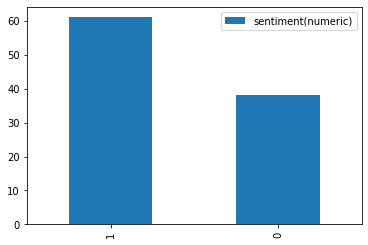

In [ ]:
rating['sentiment'].value_counts().plot(
    kind='bar', label="sentiment(numeric)").legend()

In [ ]:
rating.head()

NameError: ignored

In [ ]:
rating.shape

(99, 3)

In [ ]:
permanent = rating[['ulasan' , 'rating' , 'sentiment']]
mpermanent=permanent.dropna()
mpermanent.head()

,ulasan,rating,sentiment
0,"Halaman parkir luas, ada kantin besar dgn berb...",3,0
1,"Pelayanan tidak memuaskan, pd tanggal 16/3/21 ...",1,0
2,Untuk perubahan data di Npwp pelayanannya sang...,5,1
3,"Pengalaman waktu pengurusan npwp, berasa sanga...",4,1
4,"Pelayanan bagus, terimakasih mas Ega.. super r...",5,1


In [ ]:
y = mpermanent['sentiment']
x = mpermanent['ulasan'].reset_index()
# X =x[xindex(False)]

In [ ]:
len(y)
# len(X)

99

In [ ]:
X = x['ulasan']
print(X)

0     Halaman parkir luas, ada kantin besar dgn berb...
1     Pelayanan tidak memuaskan, pd tanggal 16/3/21 ...
2     Untuk perubahan data di Npwp pelayanannya sang...
3     Pengalaman waktu pengurusan npwp, berasa sanga...
4     Pelayanan bagus, terimakasih mas Ega.. super r...
                            ...                        
94    Tempat parkir yang luas, kantor pajak yang cuk...
95                Hanya untuk Wilayah Tangerang Selatan
96                                                 Baik
97                      Petugas yang ramah dan membantu
98                                         ramai sekali
Name: ulasan, Length: 99, dtype: object


**PRA-PROCESSING**

Stopword Removal

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
vocab_size = 122
embedding_dim = 64
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' #OOV = Out of Vocabulary
training_portion = 0.2

In [ ]:
articles = []
labels = []

with open("kpp_serpong.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in stopwords.words('indonesian'):
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

FileNotFoundError: ignored